<a href="https://colab.research.google.com/github/cmboula/MachineLearning/blob/master/IK_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scipy

Python library for doing optimization, linear algebra and also statistics!

#### Installation

just run this command on the command line
`pip install scipy`

#### statistics library

there are many usages of scipy but here we are only interested in statistics related functions.

`scipy.stats` this library has all the statistics related functions that we will use.




### Hypothesis testing

In [ ]:

!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, t, f_oneway
import matplotlib.pyplot as plt
import random



###
This code generates two random samples of size 100 from a normal distribution.
It then performs a two-sample t-test on the two samples to see if they are significantly different.
The results of the t-test are printed to the console.
The ttest_ind function in the scipy.stats module performs a two-sample t-test.

In [ ]:
# Generate two random samples of size 100 from a normal distribution.
v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

# Perform a two-sample t-test on the two samples to see if they are significantly different.
res = ttest_ind(v1, v2)

# Print the results of the t-test to the console.
print(res)

Ttest_indResult(statistic=-0.7396797241096251, pvalue=0.4603704315294689)


### DOF in this case is 198 and we can calculate the p value using the t distribution cdf function for dof 198 and critical value of -0.73 and get the same value as the ttest_ind function giving us.

In [ ]:
dof = (100-1) + (100-1)

In [ ]:
t.cdf(-0.739, 198)*2

0.4607821416096124

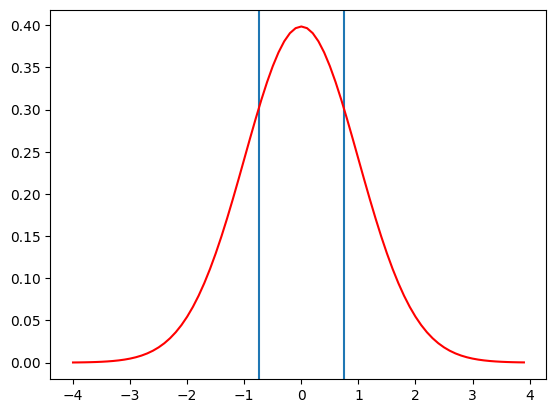

In [ ]:
x = np.arange(-4,4,0.1)
t_dist = t.pdf(x,dof)
plt.axvline(x=-0.739)
plt.axvline(x=0.739)
plt.plot(x, t_dist, 'red')


### In this case, we have subtly challenged the data. Now one of the varibales is with mean of 1 and one with mean 0 and we expect the t test to reject the null hypothesis this time as the two varibales have different means.

In [ ]:
v1 = np.random.normal(loc=1, size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=6.437539046346247, pvalue=8.977455345678487e-10)


In [ ]:
dof = (100-1) + (100-1)

In [ ]:
t.cdf(-6.437, 198)*2

9.003843808958688e-10

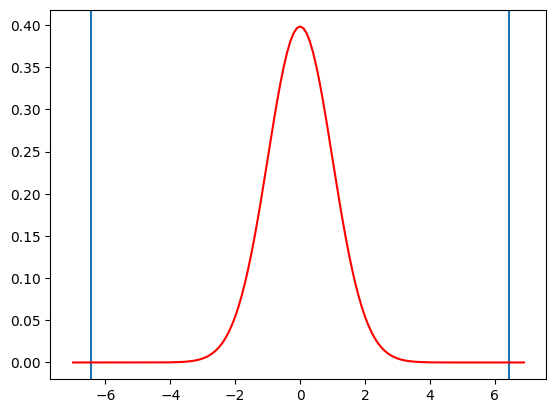

In [ ]:
x = np.arange(-7,7,0.1)
t_dist = t.pdf(x,dof)
plt.axvline(x=-6.437)
plt.axvline(x=6.437)
plt.plot(x, t_dist, 'red')


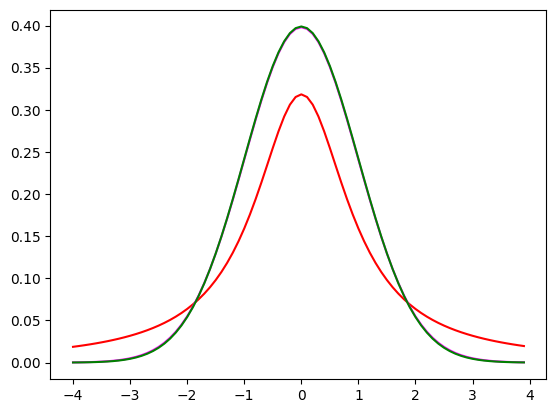

In [ ]:
x = np.arange(-4,4,0.1)
lower_df = t.pdf(x,1)
higher_df = t.pdf(x,100)
even_higher_df = t.pdf(x,1000)
plt.plot(x, lower_df, 'red', x, higher_df, 'magenta', x, even_higher_df, 'green')

### ANOVA

###
This code generates four random samples of size 100 from a normal distribution.
It then performs a one-way ANOVA test on the four samples to see if their means are significantly different.
The results of the ANOVA test are printed to the console.

In [ ]:
v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)
v3 = np.random.normal(size=100)
v4 = np.random.normal(size=100)

res = f_oneway(v1, v2, v3, v4)

print(res)

F_onewayResult(statistic=0.6855581108472087, pvalue=0.5612874318988647)


Here, again we have very similar setting but one of the variables has a mean of 1 and we expect our t test to now reject the null hypothesis that all means are same.

In [ ]:
v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)
v3 = np.random.normal(size=100)
v4 = np.random.normal(loc=1, size=100)

res = f_oneway(v1, v2, v3, v4)

print(res)

F_onewayResult(statistic=36.19664629636931, pvalue=1.0808541560963717e-20)


### Confidence interval

### Now, we generate random samples and look at the distribution of sample means. We take random samples from our data and save the sample means in the sample_means list. The mean of the random data set and the mean of sample means is same, and the standard deviation of sample means is standard deviation of the data set divided by square root of the sample size. This is central limit theorem. Now that we know the sample meand and sample standard deviation and that it follows normal distribution, we can calculate the confidence interval and any other statistics for this distribution.

In [ ]:
data = np.random.rand(10000)

In [ ]:
data[:10]

array([0.32994898, 0.53037882, 0.19437707, 0.90419139, 0.20475393,
       0.01632127, 0.52807534, 0.90289315, 0.92507879, 0.9695741 ])

In [ ]:
data_mean = np.mean(data)

In [ ]:
data_mean

0.5011138177314038

In [ ]:
data_std = np.std(data)

In [ ]:
data_std

0.28951606188923823

In [ ]:
sample_means = []
for _ in range(100):
  sample = random.choices(data, k=50)
  sample_mean = np.mean(sample)
  sample_means.append(sample_mean)

In [ ]:
sample_mean = np.mean(sample_means)

In [ ]:
sample_mean

0.5014135182800543

In [ ]:
sample_std = np.std(sample_means)

In [ ]:
sample_std

0.041153940748031075

In [ ]:
data_std/7

0.04135943741274832

In [ ]:
left = sample_mean - 2*sample_std
right = sample_mean + 2*sample_std

(array([ 1.,  4.,  8., 13., 21., 23., 13.,  6.,  8.,  3.]),
 array([0.39260978, 0.4136547 , 0.43469963, 0.45574455, 0.47678948,
        0.4978344 , 0.51887932, 0.53992425, 0.56096917, 0.58201409,
        0.60305902]),
 <BarContainer object of 10 artists>)

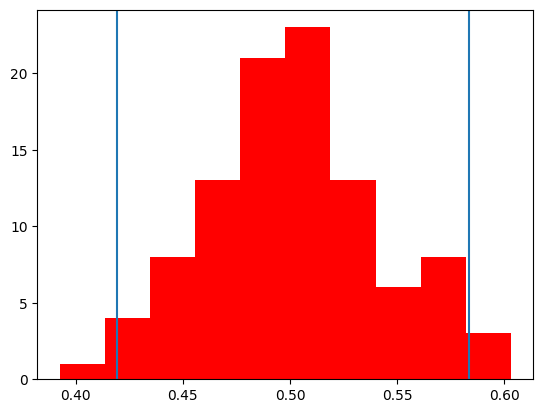

In [ ]:
plt.axvline(x=left)
plt.axvline(x=right)
plt.hist(sample_means, color='red')

### AB testing

Lets create some fake data for our demo. We have two groups A and B and we also have the conversion data for every sample. We calculate the conversion rate for the two groups and do a t test to see if the difference in conversion rates is statistically significant.

In [ ]:
converted = [0]*10000
for i in range(10000):
  if random.random() < 0.5:
    converted[i] = 1

groups = [0]*10000
for i in range(10000):
  if random.random() < 0.8:
    groups[i] = 'A'
  else:
    groups[i] = 'B'

In [ ]:
df = pd.DataFrame()

In [ ]:
df['group'] = groups
df['converted'] = converted

 Split the data into two groups, A and B


In [ ]:
df_a = df[df['group'] == 'A']
df_b = df[df['group'] == 'B']

In [ ]:
# Calculate the conversion rate for each group


In [ ]:
conversion_rate_a = df_a['converted'].mean()
conversion_rate_b = df_b['converted'].mean()

In [ ]:
conversion_rate_a, conversion_rate_b

(0.4950433705080545, 0.5124352331606218)

**Plot** the **conversion** rates

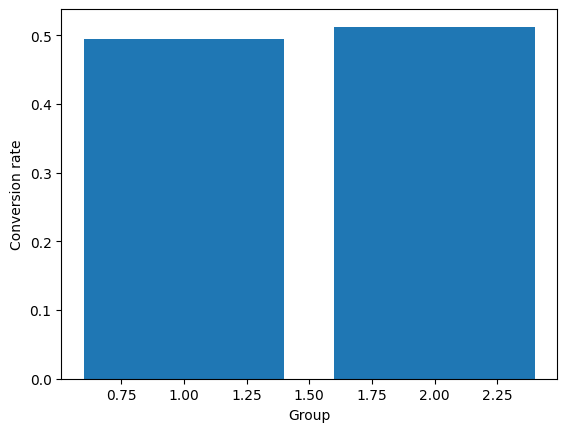

In [ ]:
plt.bar([1, 2], [conversion_rate_a, conversion_rate_b])
plt.xlabel('Group')
plt.ylabel('Conversion rate')
plt.show()

Conduct a hypothesis test to determine if the difference in conversion rates is statistically significant


In [ ]:
# Set the significance level
alpha = 0.05

# Calculate the p-value
p_value = ttest_ind(df_a['converted'], df_b['converted'], equal_var=True).pvalue

# If the p-value is less than the significance level, then we can reject the null hypothesis and conclude that the difference in conversion rates is statistically significant
if p_value < alpha:
    print('The difference in conversion rates is statistically significant.')
else:
    print('The difference in conversion rates is not statistically significant.')

The difference in conversion rates is not statistically significant.


### Anomaly detection

Lets create some fake data for our analysis. Here we are demoing an anomaly detection model. We generate two dimentional data centered around mean (0, 0)

After fitting the data to our model, we color code the data points based on model prediction. We can see that points closer to the centre of the distribution are color coded red and points outside the distribution are color coded blue and are the anomalous data points according the model.


In [ ]:
# Define the mean and standard deviation of the distribution
mean = (0, 0)
std = (1, 1)

# Generate 1000 samples from the distribution
samples = np.random.normal(mean, std, (1000, 2))

# Print the samples
print(samples[:10])


[[ 1.06576675  0.00691012]
 [-0.36117707 -0.87867719]
 [ 0.86183479 -0.26290344]
 [ 1.2659644   1.14301541]
 [-0.35745161  0.24122587]
 [-0.87430168 -2.33508868]
 [ 1.17829733  0.18044806]
 [ 1.63797467  0.94186853]
 [-0.85049537  1.11014919]
 [ 1.2459977   1.4394329 ]]


In [ ]:
samples.shape

(1000, 2)

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=10, contamination='auto')
model.fit(samples)


IsolationForest(n_estimators=10)

In [ ]:
model

IsolationForest(n_estimators=10)

Once the model is trained, you can use it to make predictions on the same data:


In [ ]:
y_pred = model.predict(samples)


In [ ]:
y_pred.shape

(1000,)

In [ ]:
y_pred[:10]

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

<ipython-input-167-f56f4e49e432>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


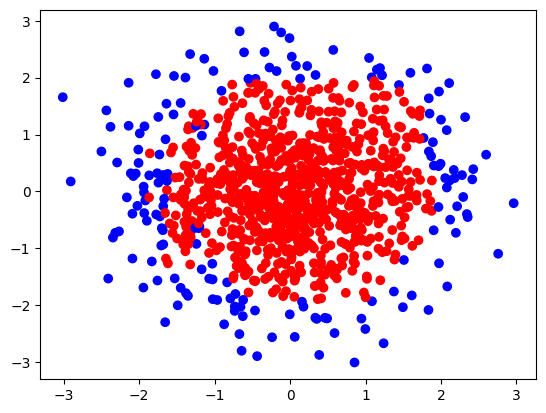

In [ ]:
# Create a colormap
cmap = plt.cm.get_cmap('cool')

# Color the points by whether prediction is 1 or -1
c = np.where(y_pred == 1, 'red', 'blue')

# Plot the points
plt.scatter(samples[:,0], samples[:,1], c=c)

# Show the plot
plt.show()
